In [55]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
tf.random.set_seed(42)
np.random.seed(42)

#### DNN with 20 hidden layers of 100 neurons each

In [57]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[32,32,3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="elu",
              kernel_initializer="he_normal"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 100)                 │         307,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 100)                 │          10,100 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 499,200 (1.90 MB)

 Trainable params: 499,200 (1.90 MB)

 Non-trainable params: 0 (0.00 B)

### CIFAR10 dataset

In [59]:
model.add(keras.layers.Dense(10,activation="softmax"))

In [60]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [61]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
X_valid = X_train_full[:5000]
y_train = y_train_full[5000:]
y_valid = y_train_full[:5000]

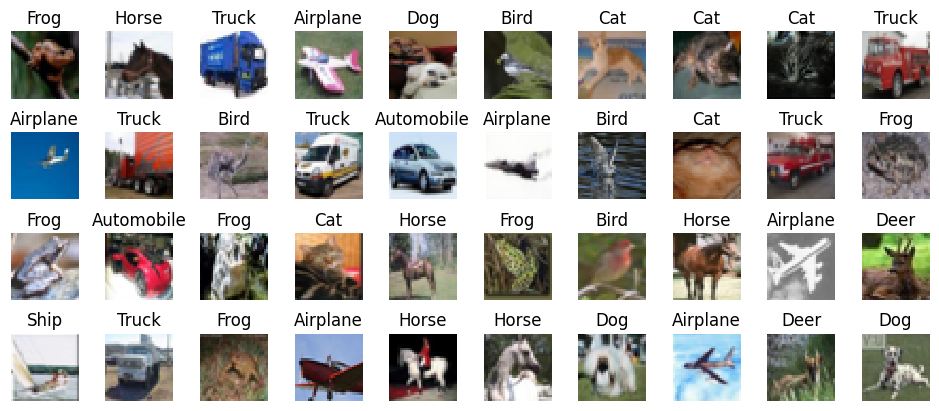

In [62]:
cifar10_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index],cmap='binary',interpolation="nearest")
        plt.title(cifar10_labels[y_train[index][0]],fontsize=12)
        plt.axis(False)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [63]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.keras", save_best_only=True)
callbacks = [early_stopping_cb,model_checkpoint_cb]

In [64]:
history_ = model.fit(X_train,y_train,epochs=100,
                     validation_data=(X_valid,y_valid),
                     callbacks=callbacks)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.1299 - loss: 11.1935 - val_accuracy: 0.2284 - val_loss: 2.1574
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.2344 - loss: 2.1134 - val_accuracy: 0.2738 - val_loss: 1.9893
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2841 - loss: 1.9655 - val_accuracy: 0.3112 - val_loss: 1.8901
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3088 - loss: 1.8873 - val_accuracy: 0.3410 - val_loss: 1.8242
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3379 - loss: 1.8202 - val_accuracy: 0.3508 - val_loss: 1.7770
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3545 - loss: 1.7707 - val_accuracy: 0.3768 - val_loss: 1.7295
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3724 - loss: 1.7301 - val_accuracy: 0.3678 - val_loss: 1.7260
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3866 - lo

In [65]:
model = keras.models.load_model("my_cifar10_model.keras")
model.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4355 - loss: 1.5975


[1.6195929050445557, 0.4343999922275543]

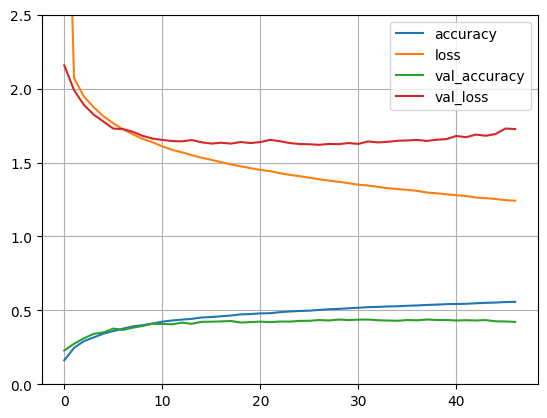

In [66]:
pd.DataFrame(history_.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 2.5)
plt.show()

In [67]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
model.add(keras.layers.BatchNormalization())

for _ in range(20):
    model.add(keras.layers.Dense(200, kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-3)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.keras", save_best_only=True)

callbacks = [early_stopping_cb, model_checkpoint_cb]

history_2 = model.fit(X_train,y_train,epochs=100,
                      validation_data=(X_valid,y_valid),
                      callbacks=callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.2508 - loss: 2.0809 - val_accuracy: 0.3038 - val_loss: 2.0923
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3381 - loss: 1.8140 - val_accuracy: 0.3482 - val_loss: 1.8698
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3902 - loss: 1.6913 - val_accuracy: 0.4062 - val_loss: 1.7379
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.4287 - loss: 1.6007 - val_accuracy: 0.3972 - val_loss: 1.7607
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4570 - loss: 1.5302 - val_accuracy: 0.4194 - val_loss: 1.7594
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4831 - loss: 1.4670 - val_accuracy: 0.4438 - val_loss: 1.7169
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5083 - loss: 1.4060 - val_accuracy: 0.4654 - val_loss: 1.6236
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5252 

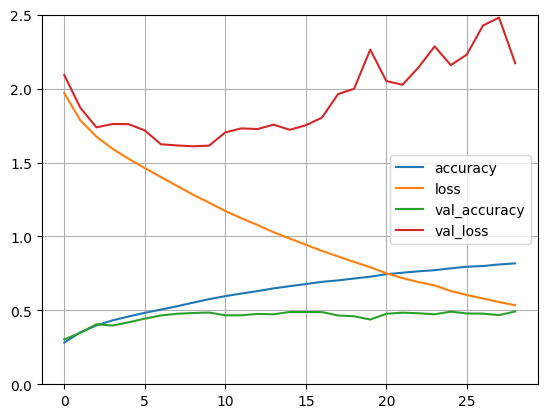

In [68]:
pd.DataFrame(history_2.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 2.5)
plt.show()

In [69]:
model = keras.models.load_model("my_cifar10_model.keras")
model.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4355 - loss: 1.5975


[1.6195929050445557, 0.4343999922275543]

### Batch Normalization with SELU

In [74]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.keras", save_best_only=True)
callbacks = [early_stopping_cb, model_checkpoint_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

history_3 = model.fit(X_train_scaled, y_train, epochs=100,
            validation_data=(X_valid_scaled, y_valid),
            callbacks=callbacks)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.2555 - loss: 2.0653 - val_accuracy: 0.3516 - val_loss: 1.8072
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3754 - loss: 1.7488 - val_accuracy: 0.4286 - val_loss: 1.6573
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4228 - loss: 1.6336 - val_accuracy: 0.4436 - val_loss: 1.6161
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4562 - loss: 1.5578 - val_accuracy: 0.4546 - val_loss: 1.5606
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4797 - loss: 1.4951 - val_accuracy: 0.4674 - val_loss: 1.5659
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4991 - loss: 1.4410 - val_accuracy: 0.4706 - val_loss: 1.5387
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5136 - loss: 1.4023 - val_accuracy: 0.4818 - val_loss: 1.5226
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5311 - loss

In [75]:
model = keras.models.load_model("my_cifar10_selu_model.keras")
model.evaluate(X_valid_scaled, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4925 - loss: 1.5143


[1.5225811004638672, 0.48179998993873596]

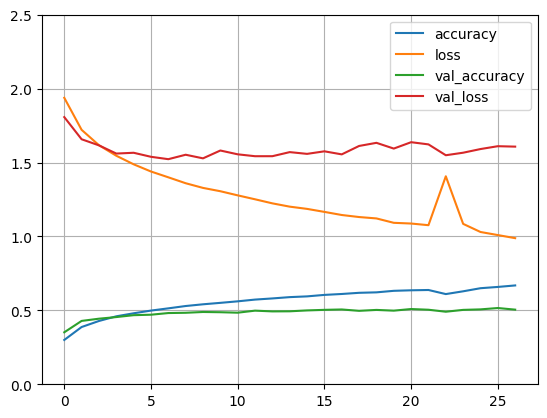

In [76]:
pd.DataFrame(history_3.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 2.5)
plt.show()

### MC Dropout.

In [77]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_alpha_dropout_model.keras", save_best_only=True)
callbacks = [early_stopping_cb, model_checkpoint_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

history_4 = model.fit(X_train_scaled, y_train, epochs=100,
            validation_data=(X_valid_scaled, y_valid),
            callbacks=callbacks)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.2706 - loss: 2.0707 - val_accuracy: 0.3762 - val_loss: 1.7768
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3936 - loss: 1.7052 - val_accuracy: 0.4036 - val_loss: 1.6839
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4346 - loss: 1.6003 - val_accuracy: 0.4450 - val_loss: 1.5866
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4657 - loss: 1.5237 - val_accuracy: 0.4634 - val_loss: 1.5947
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4872 - loss: 1.4655 - val_accuracy: 0.4842 - val_loss: 1.5847
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5048 - loss: 1.4177 - val_accuracy: 0.4784 - val_loss: 1.5872
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.5253 - loss: 1.3734 - val_accuracy: 0.4898 - val_loss: 1.5661
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5403 - loss

In [78]:
model = keras.models.load_model("my_cifar10_alpha_dropout_model.keras")
model.evaluate(X_valid_scaled, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4933 - loss: 1.5765


[1.5661089420318604, 0.48980000615119934]

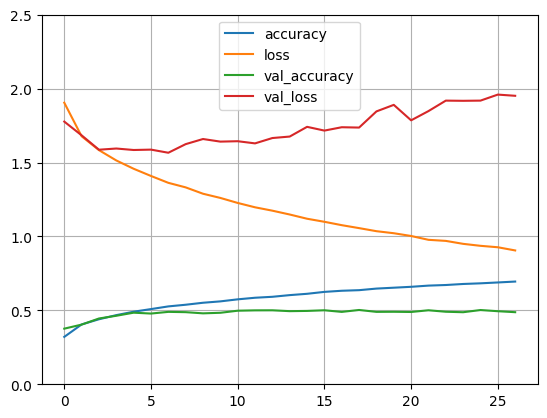

In [79]:
pd.DataFrame(history_4.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 2.5)
plt.show()

### 1cycle scheduling

In [87]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [88]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1

In [89]:
n_epochs = 15
onecycle = OneCycleScheduler(math.ceil(len(X_train_scaled) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.1737 - loss: 2.4997 - val_accuracy: 0.3092 - val_loss: 1.9329
Epoch 2/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2748 - loss: 2.0787 - val_accuracy: 0.3400 - val_loss: 1.8469
Epoch 3/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3114 - loss: 1.9682 - val_accuracy: 0.3574 - val_loss: 1.8027
Epoch 4/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3369 - loss: 1.8964 - val_accuracy: 0.3732 - val_loss: 1.7728
Epoch 5/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3478 - loss: 1.8515 - val_accuracy: 0.3796 - val_loss: 1.7510
Epoch 6/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3642 - loss: 1.8012 - val_accuracy: 0.3880 - val_loss: 1.7284
Epoch 7/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3719 - loss: 1.7723 - val_accuracy: 0.3972 - val_loss: 1.7123
Epoch 8/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3893 - loss: 1.7271 - val_accuracy: 0

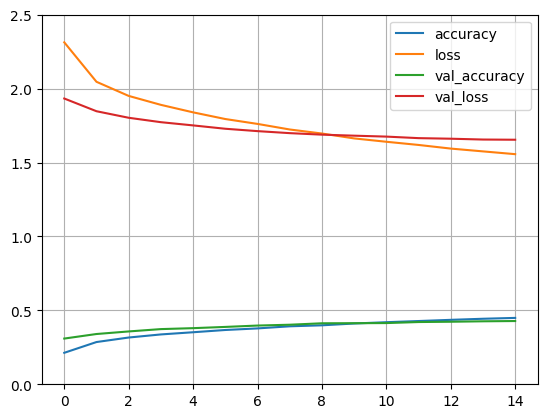

In [90]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 2.5)
plt.show()